In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

from modules.forecasting.models.prophet import ProphetModel
from modules.forecasting.data.preprocess_coin import CoinPreprocessor
import modules.forecasting.models.prophet as prophet_pkg

# 1. Locate saved model dir (same trick as sarimax)
model_dir = Path(prophet_pkg.__file__).parent / "saved" / "prophet"

# 2. Load model
model = ProphetModel("ETH", model_dir=model_dir)
model.load()

In [11]:
cp = CoinPreprocessor()
hist_df = cp.load_features_series("ETH", exchange="binance", interval="1h")
series = hist_df["close"]
print("history length:", len(series))

history length: 2967


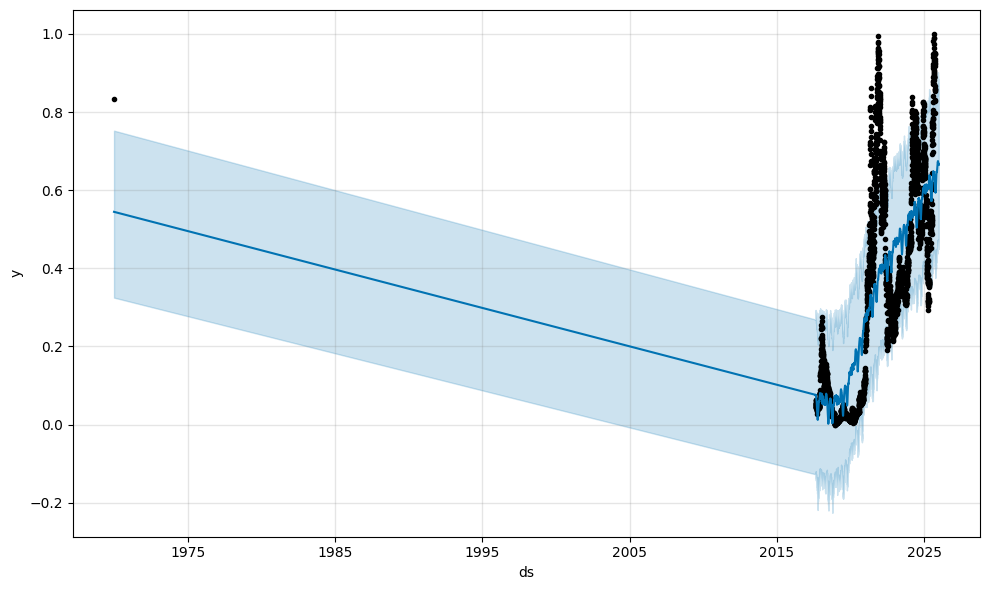

In [18]:
df_prophet = hist_df.reset_index()[["time", "close"]].rename(columns={"time": "ds", "close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

forecast = model.model.predict(model.model.make_future_dataframe(periods=90, freq="D"))
fig1 = model.model.plot(forecast)
plt.show()

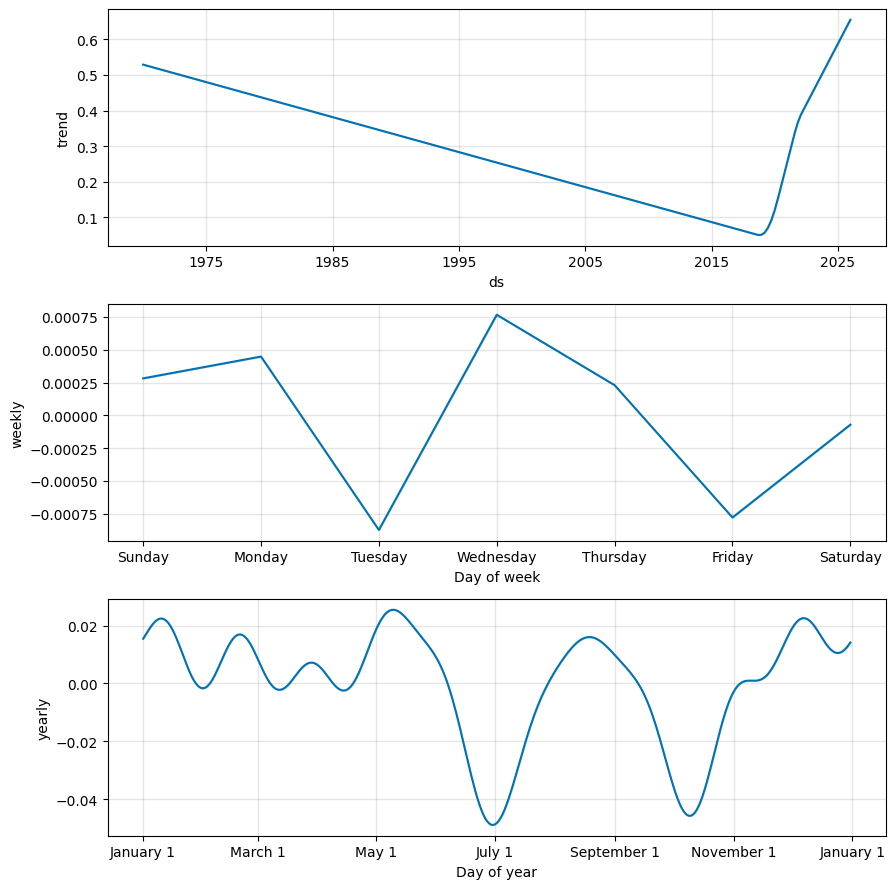

In [19]:
fig2 = model.model.plot_components(forecast)
plt.show()